# 1. yolov5 설치

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # 깃허브 레퍼지토리 클론
%cd yolov5
%pip install -qr requirements.txt # requirements.txt를 사용해 필요 항목 설치
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # 이미지 출력

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 111 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.60 MiB | 15.64 MiB/s, done.
Resolving deltas: 100% (10962/10962), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00


# 2. 학습시킬 데이터셋 모으기
- 필요한 데이터셋은 Roboflow에서 가져온다.
- 자동차 탐지 :	bike,	cycle,	pedestrian,	vehicle
- https://universe.roboflow.com/muhammad-tamjid-rahmanb6xvp/a4.1/dataset/1

In [ ]:
# 환경설정
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow # roboflow 설치

from roboflow import Roboflow # robofllow 불러오기

rf = Roboflow(api_key="GQHeE9DkPvNhZZ8AdNx4")
project = rf.workspace("muhammad-tamjid-rahman-b6xvp").project("a4.1")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/A4.1-1 in yolov5pytorch:: 100%|██████████| 2025/2025 [00:00<00:00, 3111.29it/s]


# 3. Roboflow에서 가져온 데이터셋으로 학습

In [ ]:
pwd

'/content/yolov5'

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data /content/datasets/A4.1-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/A4.1-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

# 4. 테스트 이미지로 학습된 모델 성능 확인

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/car01.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/car01.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/car01.jpg: 224x416 8 vehicles, 42.8ms
Speed: 0.5ms pre-process, 42.8ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


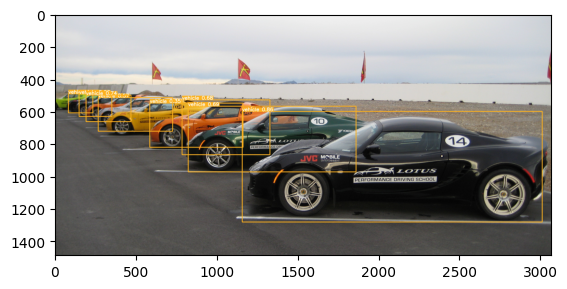

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/yolov5/runs/detect/exp/car01.jpg')
imgplot = plt.imshow(img)
plt.show()
# 아래 사진을 보면 탐지가 잘 된것을 볼 수 있다.

## 객체 탐지된 이미지는 Detected Object 폴더에서 확인 가능하다.
- `runs/detect/exp` 에서도 확인가능

# 5. 학습된 모델 다운받기

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Instance Segmentation 객체 탐지
- Roboflow에서 segmetation 데이터셋을 불러온다.

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="GQHeE9DkPvNhZZ8AdNx4")
project = rf.workspace("yolo-v8-oefpj").project("yolov8-instance-segmentation")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/YOLOv8-Instance-Segmentation-1 in yolov5pytorch:: 100%|██████████| 1070/1070 [00:00<00:00, 2696.23it/s]


In [9]:
# segmentation 모델을 다운받는다.
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 59.6MB/s]

100%|██████████| 14.9M/14.9M [00:01<00:00, 12.9MB/s]

100%|██████████| 42.4M/42.4M [00:02<00:00, 19.2MB/s]

100%|██████████| 91.9M/91.9M [00:05<00:00, 17.0MB/s]

100%|██████████| 170M/170M [00:09<00:00, 18.6MB/s]



In [10]:
# 앞서 수행했던 Bounding box 탐지가 아닌 segmentation 학습을 수행해야 한다.
# train.py가 아닌 segment 폴더에 있는 train.py를 써주자
!python segment/train.py --img 320 --batch 128 --epochs 100 --data /content/datasets/YOLOv8-Instance-Segmentation-1/data.yaml --weights yolov5s-seg.pt --name custom-dataset

segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/datasets/YOLOv8-Instance-Segmentation-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

In [16]:
!python segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source ../car01.jpg --name custom-dataset

segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=../car01.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7433483 parameters, 0 gradients, 25.8 GFLOPs
image 1/1 /content/car01.jpg: 160x320 3 fenders, 1 front bumper, 1 front doors, 1 hood, 1 quarters, 44.9ms
Speed: 0.4ms pre-process, 44.9ms inference, 1.4ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/custom-dataset3


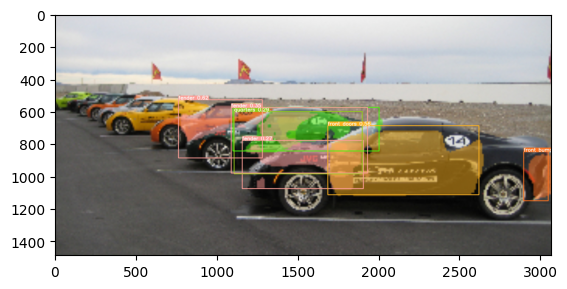

In [17]:
img = mpimg.imread('/content/yolov5/runs/predict-seg/custom-dataset3/car01.jpg')
imgplot = plt.imshow(img)
plt.show()
# 아래 사진을 보면 탐지가 잘 된것을 볼 수 있다.